In [57]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy.stats import poisson

from qutip import *
import laser
import cnb
import entropy_utils

In [58]:
%matplotlib inline
%reload_ext autoreload
%autoreload 1
%aimport laser, cnb, entropy_utils

In [59]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')

## An example for CNB I and CNB II

In [60]:
# CNB I
N = 1600 # number of trapped bosons
kappa = 1.2e-7 # rate constant
TTc = 0.94 # T/T_c, where T_c is the critical temperature

init_psi = fock(N + 1, 0) # initial state

cnb1 = cnb.CNB(N, kappa, TTc, eta=0) # CNB I
cnb2 = cnb.CNB(N, kappa, TTc, eta=0.368) # CNB II

In [61]:
t_list = np.linspace(0, 600000, 1001)

print(str(datetime.now()))
cnb1.pn_evolve(init_psi, t_list1)
print(str(datetime.now()))
cnb2.pn_evolve(init_psi, t_list1)
print(str(datetime.now()))

2017-08-08 14:16:38.376401
2017-08-08 14:20:33.785598
2017-08-08 14:23:21.186122


In [105]:
n_dict = {'$\kappa t$': t_list * kappa}
entr_dict = {'$\kappa t$': t_list * kappa}
pn_dict = {'n': np.arange(N + 1)}

n_dict['CNB I'] = cnb1.get_ns()
n_dict['CNB II'] = cnb2.get_ns()
entr_dict['CNB I'] = cnb1.get_entrs()
entr_dict['CNB II'] = cnb2.get_entrs()
pn_dict['CNB I'] = cnb1.get_pns()[-1]
pn_dict['CNB II'] = cnb2.get_pns()[-1]

n_df = pd.DataFrame(n_dict, columns=n_dict.keys())
entr_df = pd.DataFrame(entr_dict, columns=entr_dict.keys())
pn_df = pd.DataFrame(pn_dict, columns=pn_dict.keys())

### Setup

- Number of Bosons: N = 1600
- Temperature: T/T_c = 0.94
- Rate Constant: kappa = 1.2e-7
- Cross Excitation Parameters for CNB II: eta = 0.368

### Results

#### Avergae Boson Numbers vs. Time

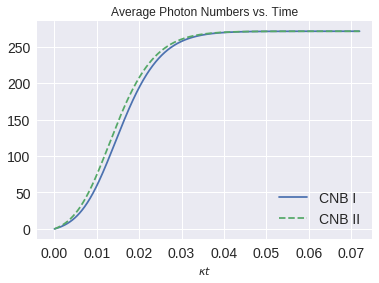

In [117]:
n_df.plot(x='$\kappa t$', xlim=(-0.004, 0.075), 
          figsize=(6, 4), fontsize=14, style=['-', '--'])
plt.legend(fontsize=14, loc=4)
plt.title("Average Boson Numbers vs. Time")

#### Entropy vs. Time

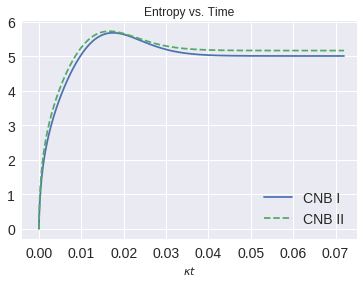

In [118]:
entr_df.plot(x='$\kappa t$', xlim=(-0.004, 0.075), 
             figsize=(6, 4), fontsize=14, style=['-', '--'])
plt.legend(fontsize=14, loc=4)
plt.title("Entropy vs. Time")

#### Probability Distribution of Stable State

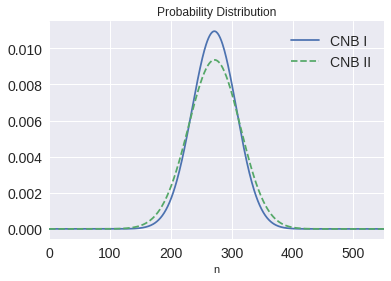

In [120]:
pn_df.plot(x='n', xlim=(0, 550), 
           figsize=(6, 4), fontsize=14, style=['-', '--'])
plt.legend(fontsize=14, loc=1)
plt.title("Probability Distribution")

In [122]:
1600 - 1600 * 0.94**3

271.06560000000013

In [123]:
1600 * 0.94**3

1328.9343999999999